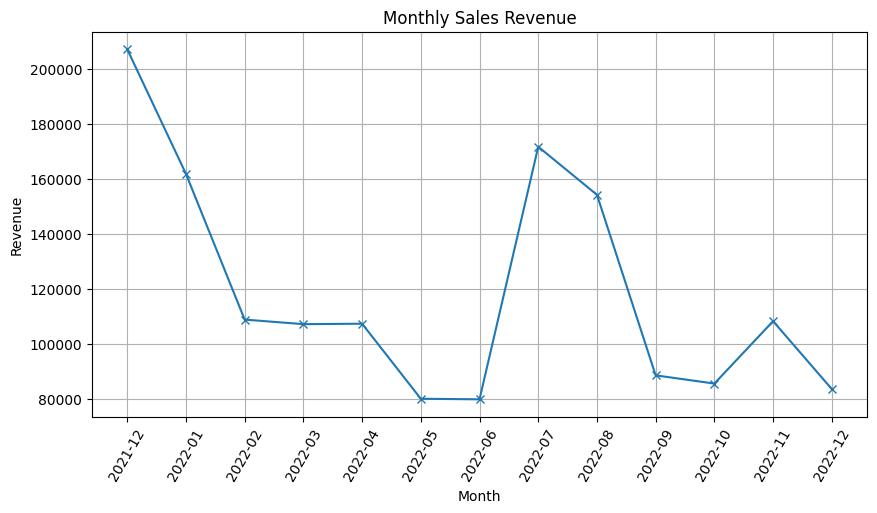

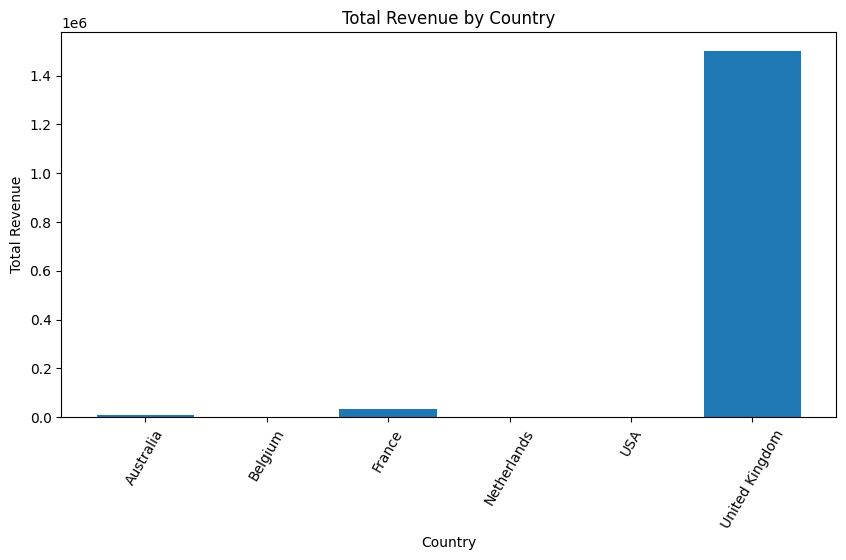

Inventory Recommendations for Top 10 Products:
     StockCode  Quantity  Optimal Stock Level
2041    85123A     29455              38291.5
2028    85099B     21808              28350.4
1920     84879     10218              13283.4
653      21877      7442               9674.6
284      21181      7147               9291.1
696      21928      6072               7893.6
710      21955      6060               7878.0
473      21523      6020               7826.0
870      22188      5930               7709.0
871      22189      5729               7447.7


17:38:39 - cmdstanpy - INFO - Chain [1] start processing
17:38:39 - cmdstanpy - INFO - Chain [1] done processing


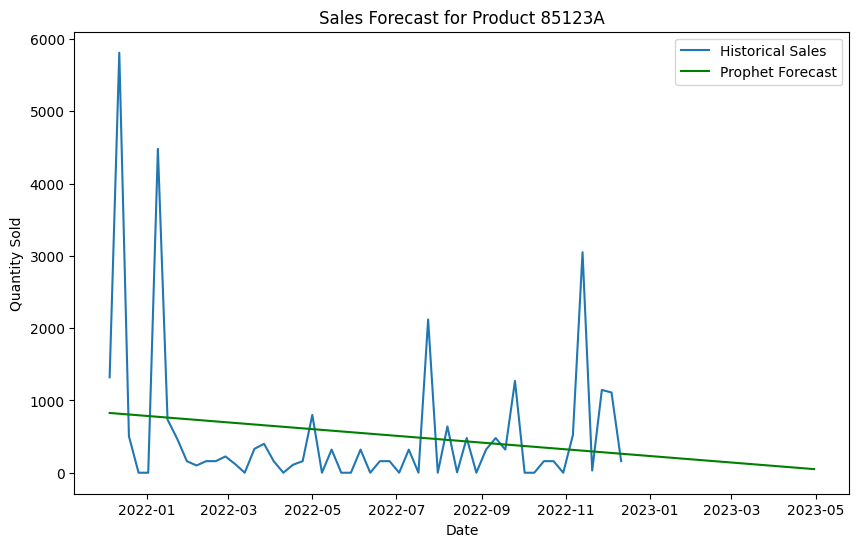

17:38:40 - cmdstanpy - INFO - Chain [1] start processing
17:38:40 - cmdstanpy - INFO - Chain [1] done processing


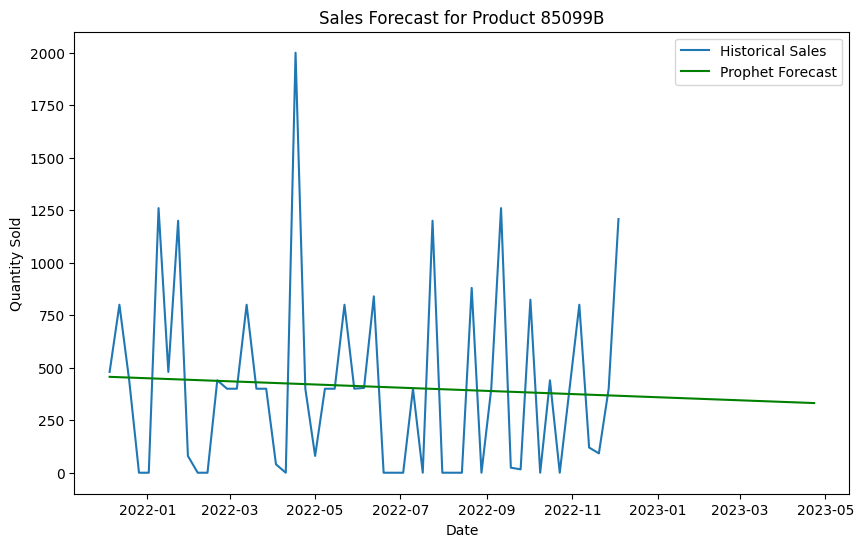

17:38:40 - cmdstanpy - INFO - Chain [1] start processing
17:38:40 - cmdstanpy - INFO - Chain [1] done processing


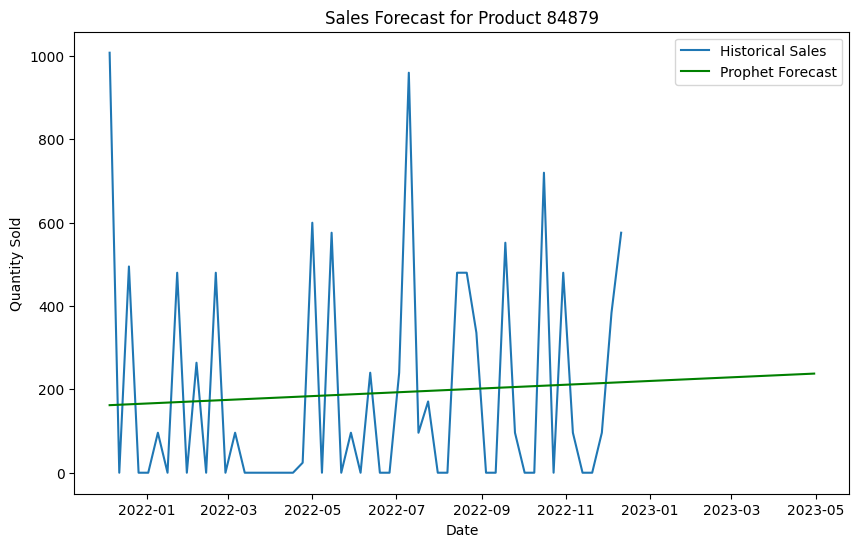

17:38:41 - cmdstanpy - INFO - Chain [1] start processing
17:38:41 - cmdstanpy - INFO - Chain [1] done processing


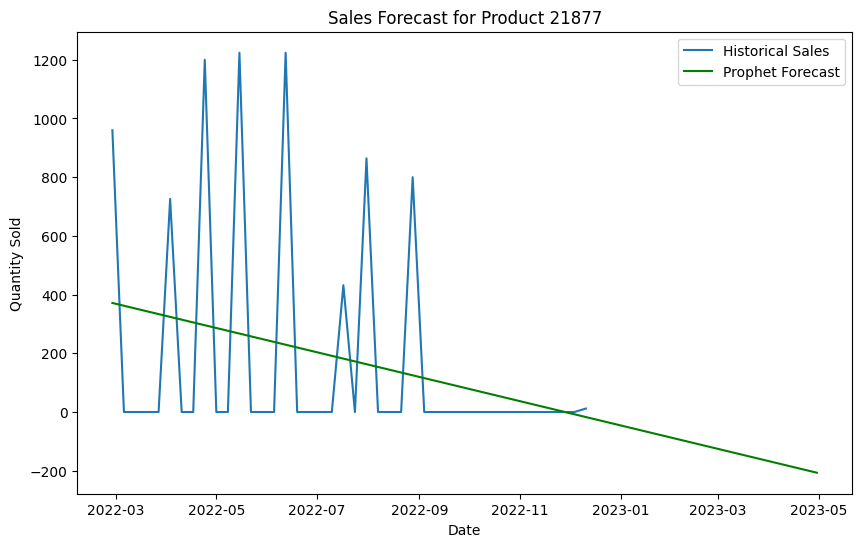

17:38:42 - cmdstanpy - INFO - Chain [1] start processing
17:38:42 - cmdstanpy - INFO - Chain [1] done processing


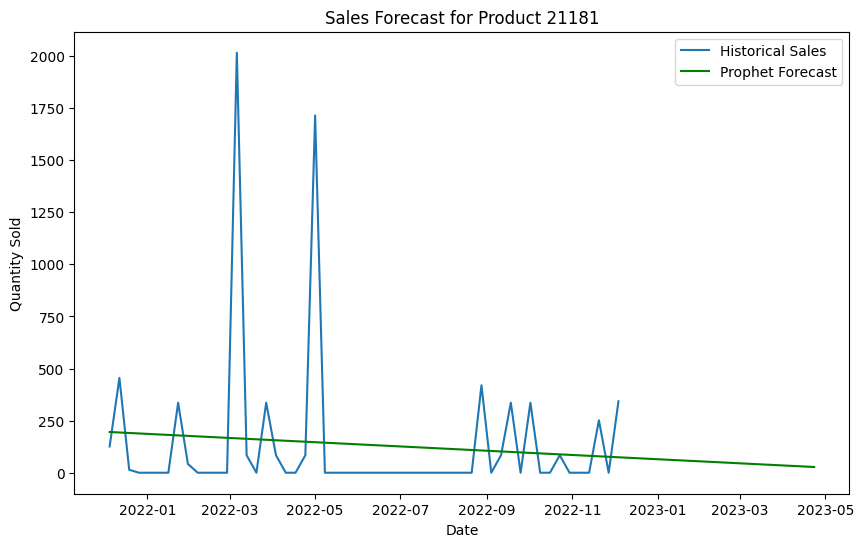

17:38:42 - cmdstanpy - INFO - Chain [1] start processing
17:38:42 - cmdstanpy - INFO - Chain [1] done processing


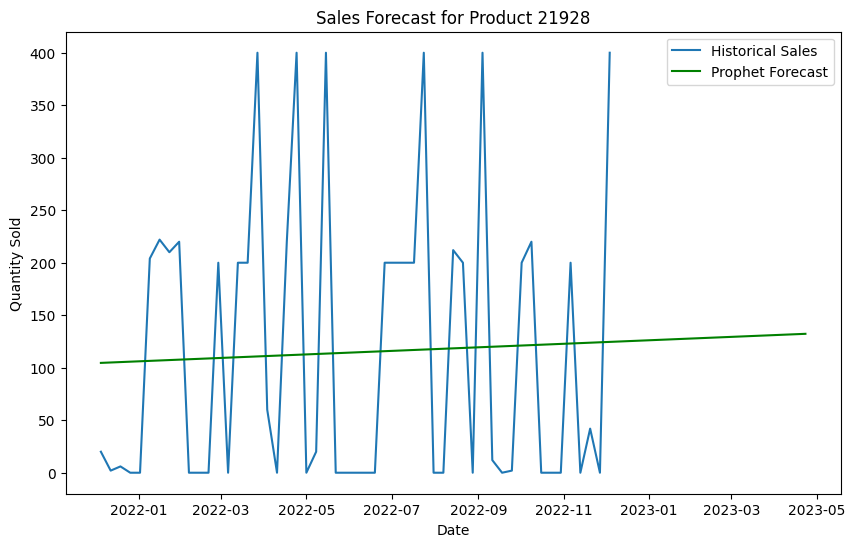

17:38:43 - cmdstanpy - INFO - Chain [1] start processing
17:38:43 - cmdstanpy - INFO - Chain [1] done processing


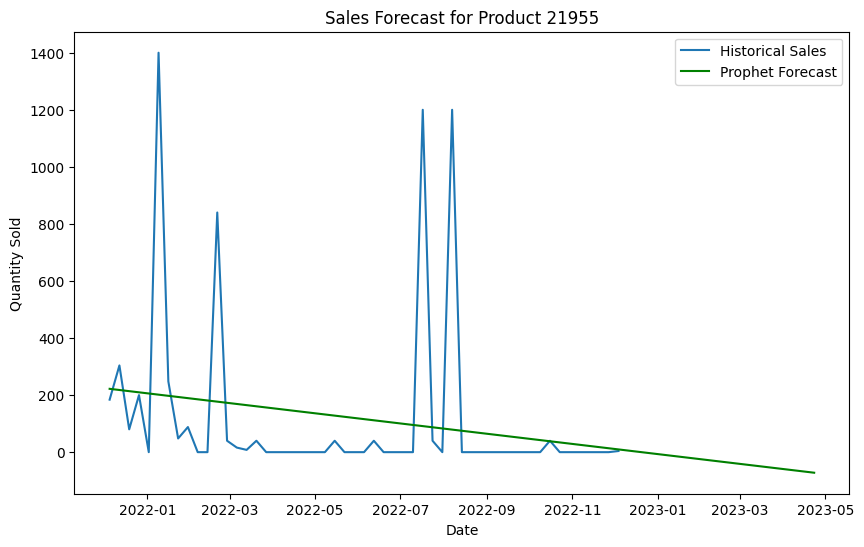

17:38:43 - cmdstanpy - INFO - Chain [1] start processing
17:38:43 - cmdstanpy - INFO - Chain [1] done processing


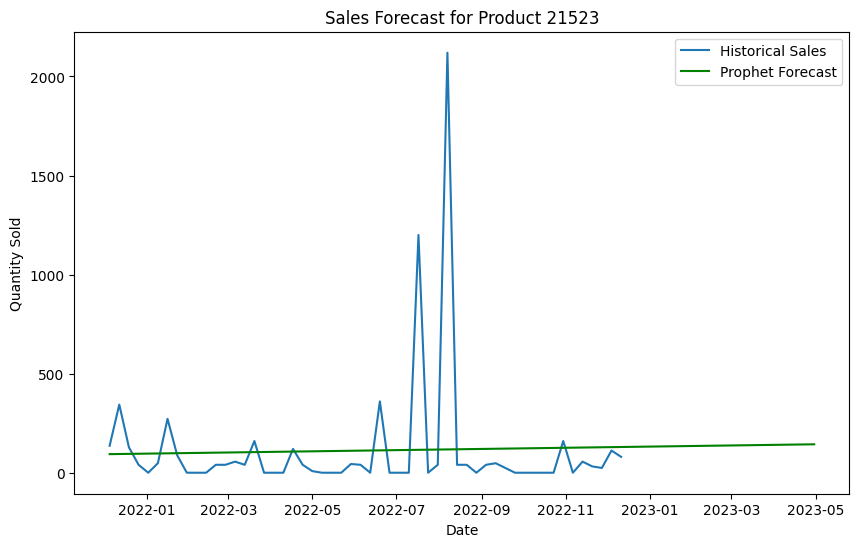

c:\Users\91995\Desktop\CODE\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
17:38:44 - cmdstanpy - INFO - Chain [1] start processing
17:38:44 - cmdstanpy - INFO - Chain [1] done processing


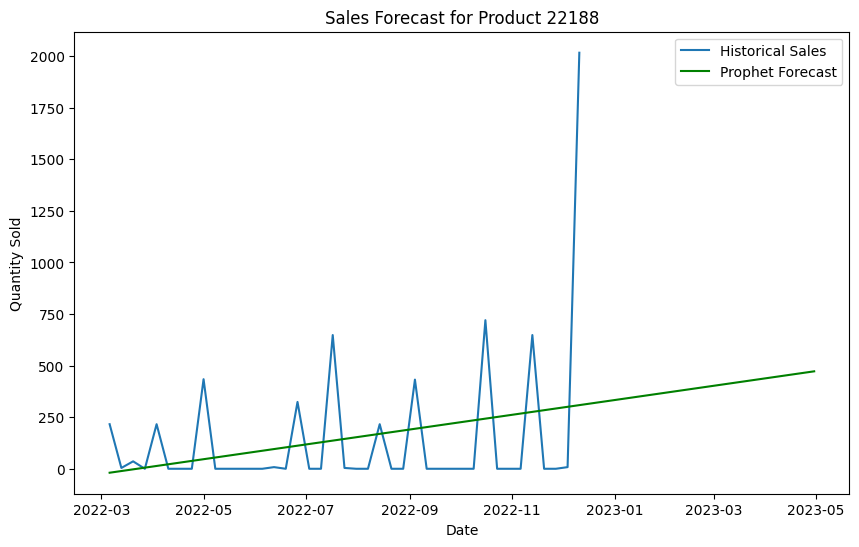

c:\Users\91995\Desktop\CODE\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
17:38:44 - cmdstanpy - INFO - Chain [1] start processing
17:38:45 - cmdstanpy - INFO - Chain [1] done processing


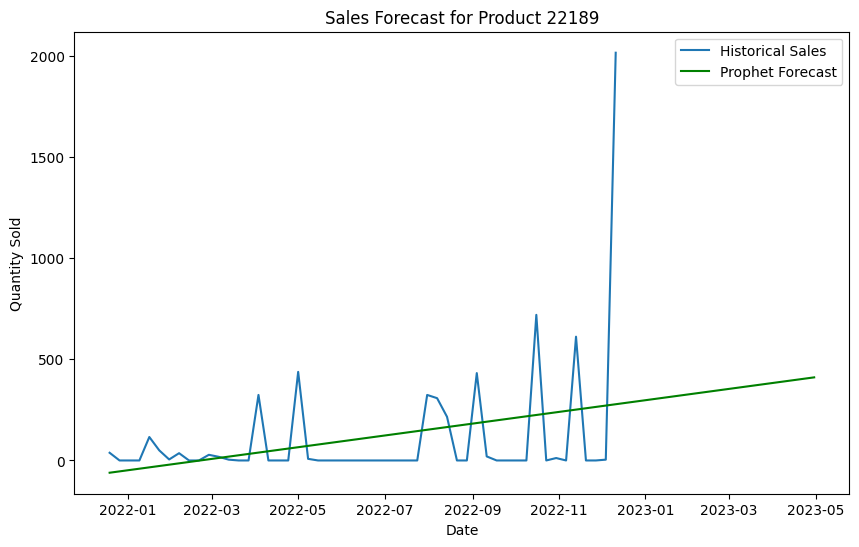

XGBoost Model RMSE: 23.509183155229437


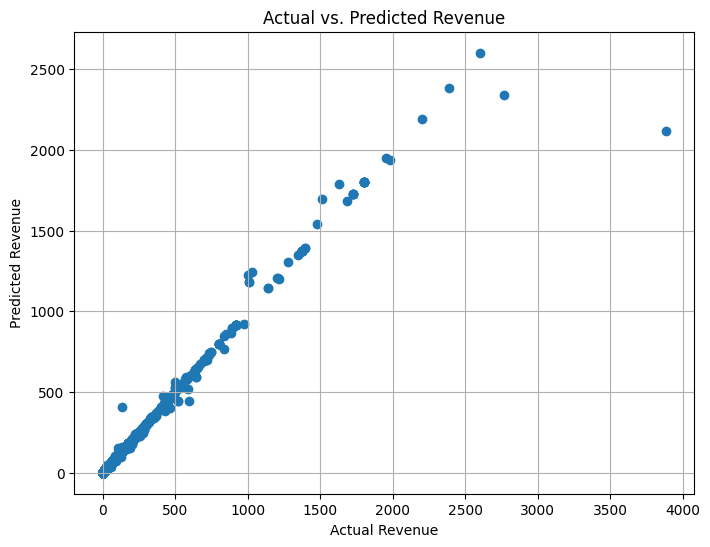

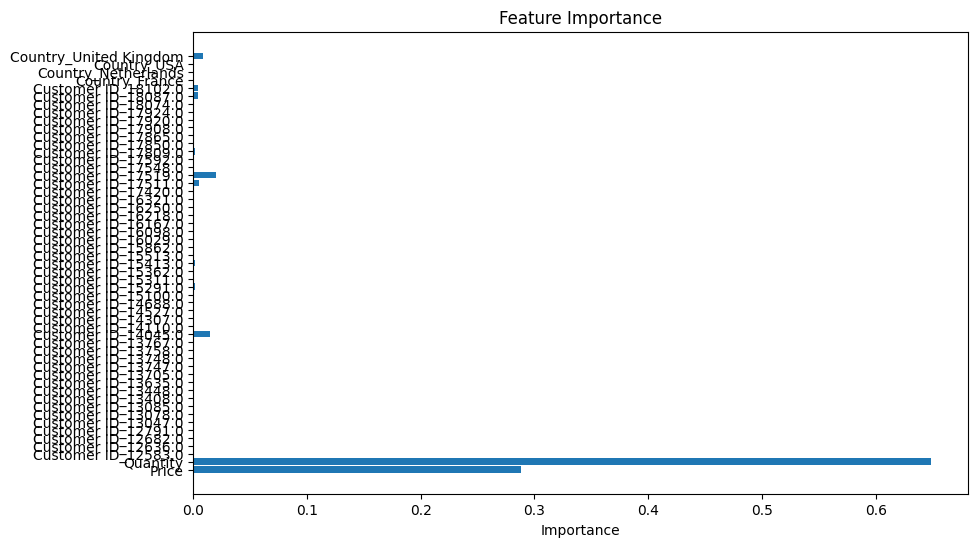

Summary Statistics of Transactional Data:
           Quantity         Price   Customer ID  \
count  26682.000000  26682.000000  26682.000000   
mean      23.822652      3.633183  15852.431677   
min        1.000000      0.001000  12362.000000   
25%        3.000000      1.450000  14527.000000   
50%        6.000000      2.550000  15362.000000   
75%       14.000000      4.950000  17850.000000   
max     1200.000000    359.710000  18102.000000   
std       59.505958      5.458493   1884.767123   

                         InvoiceDate       Revenue  
count                          26682  26682.000000  
mean   2022-05-28 14:55:30.425005568     57.879052  
min              2021-12-01 00:00:00      0.001000  
25%              2022-02-02 00:00:00      8.700000  
50%              2022-05-18 00:00:00     17.700000  
75%              2022-09-22 00:00:00     40.680000  
max              2022-12-09 00:00:00   3884.000000  
std                              NaN    168.869924  
Top 10 Customers by R

C:\Users\91995\AppData\Local\Temp\ipykernel_11676\138920665.py:173: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_segments = transactional_data.groupby('Revenue Bracket')['Customer ID'].nunique().reset_index()


In [22]:
# import basic libraries for data visualization & handling
import pandas as pd
import matplotlib.pyplot as plt 

# loading the csv files
product_info= pd.read_csv('C:/Users/91995/Desktop/DS_assignemnt/ProductInfo.csv')
transactional_data_1= pd.read_csv('C:/Users/91995/Desktop/DS_assignemnt/Transactional_data_retail_01.csv')
transactional_data_2= pd.read_csv('C:/Users/91995/Desktop/DS_assignemnt/Transactional_data_retail_02.csv')
customer_demographics= pd.read_csv('C:/Users/91995/Desktop/DS_assignemnt/CustomerDemographics.csv')

# combining all the data together
transactional_data= pd.concat([transactional_data_1, transactional_data_2], ignore_index=True)
transactional_data = transactional_data.merge(customer_demographics, on='Customer ID', how='left')
transactional_data = transactional_data.merge(product_info, on='StockCode', how='left')

transactional_data['InvoiceDate'] = pd.to_datetime(transactional_data['InvoiceDate'], errors='coerce')# Convert into datetime
# as there are some invalid transactions in the dataset, we will remove them
transactional_data = transactional_data[(transactional_data['Quantity'] > 0) & (transactional_data['Price'] > 0)]
transactional_data['Revenue'] = transactional_data['Quantity'] * transactional_data['Price']# Calc revenue=(q*p)

# droping missing & duplicate values
transactional_data.dropna(inplace=True)
transactional_data.drop_duplicates(inplace=True)

# exploratory data analysis
total_transactions = transactional_data['Invoice'].nunique()
total_quantity_sold = transactional_data['Quantity'].sum()
total_revenue = transactional_data['Revenue'].sum()

# the top 10 products by quantity and revenue
top_10_by_quantity = transactional_data.groupby('StockCode')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)
top_10_by_revenue = transactional_data.groupby('StockCode')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).head(10)

# visualizing monthly sales trends
transactional_data['Month'] = transactional_data['InvoiceDate'].dt.to_period('M')# month from the invoice_date
monthly_sales = transactional_data.groupby('Month')['Revenue'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Revenue'], marker='x')
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=60)
plt.grid()
plt.show()

# total revenue generated from each country
customer_segments = transactional_data.groupby('Country')['Revenue'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(customer_segments['Country'], customer_segments['Revenue'])
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=60)
plt.show()

# based on top selling products we can make inventory recommendations 
inventory_recommendations = top_10_by_quantity.copy()
inventory_recommendations['Optimal Stock Level'] = inventory_recommendations['Quantity'] * 1.3 # assume safe stock to be 30%(100+30 = 1.3)
print("Inventory Recommendations for Top 10 Products:")
print(inventory_recommendations[['StockCode', 'Quantity', 'Optimal Stock Level']])

# time series forecasting, by importing propher and statsmodel
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
# ts data, organizing the data for a specific product into a time series format
def prepare_time_series_data(df, stock_code):
    data = df[df['StockCode'] == stock_code]
    data = data.groupby('InvoiceDate')['Quantity'].sum().reset_index()
    data = data.set_index('InvoiceDate').resample('W').sum()
    return data
# generating future predictions
def forecast_with_arima(data, periods=20):
    model = ARIMA(data, order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=periods)
    return forecast

def forecast_with_prophet(data, periods=20):
    data = data.reset_index()
    data.columns = ['ds', 'y']
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=periods, freq='W')
    forecast = model.predict(future)
    return forecast[['ds', 'yhat']]

# now loop through the top 10 products and generate sales forecasts using both arima and prophet models
for stock_code in top_10_by_quantity['StockCode']:
    time_series_data = prepare_time_series_data(transactional_data, stock_code)
    arima_forecast = forecast_with_arima(time_series_data)
    prophet_forecast = forecast_with_prophet(time_series_data)
    plt.figure(figsize=(10, 6))
    plt.plot(time_series_data.index, time_series_data['Quantity'], label='Historical Sales')
    plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], label='Prophet Forecast', color='green')
    plt.title(f'Sales Forecast for Product {stock_code}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.legend()
    plt.show()

# non time series modeling, importing XGBoost and scikit-learn libraries to build a predictive model
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import sqrt
features = ['Customer ID', 'Price', 'Quantity', 'Country']
X = transactional_data[features]
y = transactional_data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train = pd.get_dummies(X_train, columns=['Customer ID', 'Country'], drop_first=True)# one hot encoding for categorical variables
X_test = pd.get_dummies(X_test, columns=['Customer ID', 'Country'], drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
model = XGBRegressor()
model.fit(X_train, y_train)

# making predictions on the test data
y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'XGBoost Model RMSE: {rmse}')
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')
plt.grid()
plt.show()

# getting the importance of each feature from the model.
importance = model.feature_importances_
feature_names = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

# summary statistics of transactional data
print("Summary Statistics of Transactional Data:")
print(transactional_data.describe())

# list of top 10 customers
top_customers = transactional_data.groupby('Customer ID')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).head(10)
print("Top 10 Customers by Revenue:")
print(top_customers)
# saving the top customers data for future
top_customers.to_csv('C:/Users/91995/Desktop/DS_assignemnt/our_top_customers.csv', index=False)
print("Top customers data saved to 'top_customers.csv'.")

# monthly sales data
monthly_sales['YearMonth'] = monthly_sales['Month'].dt.to_timestamp()
monthly_sales['Year'] = monthly_sales['Month'].dt.year
monthly_sales['Month'] = monthly_sales['Month'].dt.month

monthly_sales_summary = monthly_sales.groupby(['Year', 'Month']).agg({'Revenue': 'sum'}).reset_index()
print("Monthly Sales Summary:")
print(monthly_sales_summary)

# display the growth rate of revenue month over month
monthly_sales['Growth Rate'] = monthly_sales['Revenue'].pct_change() * 100
print("Monthly Sales Growth Rate:")
print(monthly_sales[['Month', 'Growth Rate']])

# analyzing product performance by summing quantity and revenue for each product
product_performance = transactional_data.groupby('StockCode').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()
product_performance['Performance'] = product_performance['Revenue'] / product_performance['Quantity']
print("Product Performance Analysis:")
print(product_performance.sort_values(by='Revenue', ascending=False).head(10))  # Top 10 products by Revenue

# grouping the customers in the revenue brackets
transactional_data['Revenue Bracket'] = pd.cut(transactional_data['Revenue'], bins=[0, 50, 100, 200, 500, 1000, float('inf')],
                                                labels=['0-50', '51-100', '101-200', '201-500', '501-1000', '1000+'])
customer_segments = transactional_data.groupby('Revenue Bracket')['Customer ID'].nunique().reset_index()
print("Customer Segmentation by Revenue Brackets:")
print(customer_segments)

# total units sold overall
total_units_sold = transactional_data['Quantity'].sum()
print(f'Total Units Sold: {total_units_sold}')

# overall revenue by year
transactional_data['Year'] = transactional_data['InvoiceDate'].dt.year
annual_revenue = transactional_data.groupby('Year')['Revenue'].sum().reset_index()
print("Annual Revenue Summary:")
print(annual_revenue)


###### In this assignment, I tried to get some extra info like inventory recommendations for the best stock levels and sales forecasting using ARIMA and Prophet models. I also did customer segmentation based on revenue brackets and predicted revenue with an XGBoost model. Plus, I looked at product performance to find the top-selling items and calculated the revenue growth rate for monthly sales. These improvements give valuable insights into sales trends, inventory management, and customer behavior.